In [1]:
import numpy as np, pandas as pd, nltk, sklearn, gensim, matplotlib, seaborn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
paragraph =  """I have three visions for India. In 3000 years of our history, people from all over
               the world have come and invaded us, captured our lands, conquered our minds.
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours.
               Yet we have not done this to any other nation. We have not conquered anyone.
               We have not grabbed their land, their culture,
               their history and tried to enforce our way of life on them.
               Why? Because we respect the freedom of others.That is why my
               first vision is that of freedom. I believe that India got its first vision of
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India
               stands up to the world, no one will respect us. Only strength respects strength. We must be
               strong not only as a military power but also as an economic power. Both must go hand-in-hand.
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life.
               I see four milestones in my career"""

In [3]:
# Cleaning the texts
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
wordnet=WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(corpus)

CountVectorizer()

In [ ]:
print(cv.vocabulary_)

{'three': 98, 'vision': 107, 'india': 52, 'year': 112, 'history': 49, 'people': 73, 'world': 111, 'come': 15, 'invaded': 53, 'captured': 12, 'land': 55, 'conquered': 17, 'mind': 63, 'alexander': 1, 'onwards': 70, 'greek': 46, 'turk': 104, 'mogul': 64, 'portuguese': 75, 'british': 9, 'french': 38, 'dutch': 27, 'came': 11, 'looted': 58, 'took': 101, 'yet': 113, 'done': 25, 'nation': 66, 'anyone': 4, 'grabbed': 44, 'culture': 19, 'tried': 103, 'enforce': 29, 'way': 109, 'life': 57, 'respect': 84, 'freedom': 37, 'others': 72, 'first': 33, 'believe': 7, 'got': 43, 'started': 92, 'war': 108, 'independence': 51, 'must': 65, 'protect': 80, 'nurture': 68, 'build': 10, 'free': 36, 'one': 69, 'second': 87, 'development': 23, 'fifty': 32, 'developing': 22, 'time': 99, 'see': 88, 'developed': 21, 'among': 3, 'top': 102, 'term': 96, 'gdp': 39, 'percent': 74, 'growth': 47, 'rate': 81, 'area': 5, 'poverty': 76, 'level': 56, 'falling': 30, 'achievement': 0, 'globally': 40, 'recognised': 82, 'today': 10

In [ ]:
cv.transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
y = tv.fit_transform(corpus).toarray()

In [ ]:
y

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25883507, 0.30512561,
        0.        ],
       [0.        , 0.28867513, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
print(tv.vocabulary_)

{'three': 98, 'vision': 107, 'india': 52, 'year': 112, 'history': 49, 'people': 73, 'world': 111, 'come': 15, 'invaded': 53, 'captured': 12, 'land': 55, 'conquered': 17, 'mind': 63, 'alexander': 1, 'onwards': 70, 'greek': 46, 'turk': 104, 'mogul': 64, 'portuguese': 75, 'british': 9, 'french': 38, 'dutch': 27, 'came': 11, 'looted': 58, 'took': 101, 'yet': 113, 'done': 25, 'nation': 66, 'anyone': 4, 'grabbed': 44, 'culture': 19, 'tried': 103, 'enforce': 29, 'way': 109, 'life': 57, 'respect': 84, 'freedom': 37, 'others': 72, 'first': 33, 'believe': 7, 'got': 43, 'started': 92, 'war': 108, 'independence': 51, 'must': 65, 'protect': 80, 'nurture': 68, 'build': 10, 'free': 36, 'one': 69, 'second': 87, 'development': 23, 'fifty': 32, 'developing': 22, 'time': 99, 'see': 88, 'developed': 21, 'among': 3, 'top': 102, 'term': 96, 'gdp': 39, 'percent': 74, 'growth': 47, 'rate': 81, 'area': 5, 'poverty': 76, 'level': 56, 'falling': 30, 'achievement': 0, 'globally': 40, 'recognised': 82, 'today': 10

In [4]:
from gensim.models import Word2Vec

In [5]:
# Preparing the dataset
sentences = nltk.sent_tokenize(paragraph)

sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]



In [6]:

# Training the Word2Vec model
model = Word2Vec(sentences, min_count=1)

words = list(model.wv.key_to_index.keys())


In [7]:

# Finding Word Vectors
vector = model.wv['nation']

vector

array([ 8.1337513e-03, -4.4451077e-03, -1.0666905e-03,  1.0004403e-03,
       -1.8944418e-04,  1.1259107e-03,  6.1218361e-03, -9.9255140e-06,
       -3.2529512e-03, -1.5150562e-03,  5.8958526e-03,  1.5051212e-03,
       -7.0312154e-04,  9.3461378e-03, -4.9189474e-03, -8.4013498e-04,
        9.1807321e-03,  6.7436732e-03,  1.5020834e-03, -8.9055169e-03,
        1.1771092e-03, -2.2803470e-03,  9.3669035e-03,  1.2145655e-03,
        1.4929168e-03,  2.4185427e-03, -1.8445235e-03, -5.0031655e-03,
        2.3000521e-04, -2.0224543e-03,  6.6028778e-03,  8.9474404e-03,
       -6.7912589e-04,  2.9604521e-03, -6.1023515e-03,  1.7148529e-03,
       -6.9186119e-03, -8.6874962e-03, -5.8980323e-03, -8.9646289e-03,
        7.2811074e-03, -5.7753064e-03,  8.2664927e-03, -7.2444533e-03,
        3.4248424e-03,  9.6688708e-03, -7.8006573e-03, -9.9435076e-03,
       -4.3153558e-03, -2.6870631e-03, -2.6676175e-04, -8.8386675e-03,
       -8.6171161e-03,  2.7957801e-03, -8.2104271e-03, -9.0675093e-03,
      

In [9]:
# Most similar words
similar = model.wv.most_similar('nation')
similar

[('invaded', 0.34908947348594666),
 ('worked', 0.3050435185432434),
 ('3000', 0.24919985234737396),
 ('Dutch', 0.2227780669927597),
 ('Yet', 0.1777239888906479),
 ('life', 0.16458234190940857),
 ('strength', 0.16390132904052734),
 ('Dhawan', 0.1620500534772873),
 ('War', 0.15492145717144012),
 ('From', 0.1531510204076767)]

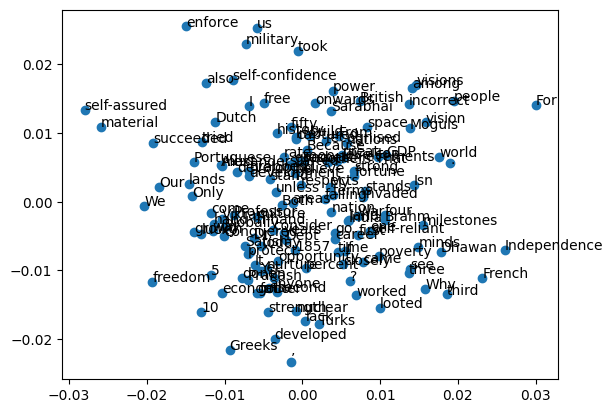

In [10]:
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(model.wv.vectors)

# Plot the words
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for i, word in enumerate(model.wv.index_to_key):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.show()

In [ ]:
!wget nlp.stanford.edu/data/glove.6B.zip

--2024-09-12 16:21:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-09-12 16:21:05--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-09-12 16:21:06--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Convert GloVe to Word2Vec format
glove_input_file = 'glove.6B.100d.txt'
glove_output_file = 'glove.6B.100d.word2vec.txt'
glove2word2vec(glove_input_file, glove_output_file)

# Load the Word2Vec format into Gensim
model = KeyedVectors.load_word2vec_format(glove_output_file, binary=False)

<ipython-input-25-9f9390bf90b4>:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, glove_output_file)


In [ ]:
similarity = model.similarity('apple', 'banana')
print(similarity)

0.5054469


In [ ]:
analogy = model.most_similar(positive=['king', 'woman'], negative=['man'])
print(analogy)

[('queen', 0.7698540687561035), ('monarch', 0.6843381524085999), ('throne', 0.6755736470222473), ('daughter', 0.6594556570053101), ('princess', 0.6520534157752991), ('prince', 0.6517034769058228), ('elizabeth', 0.6464517712593079), ('mother', 0.631171703338623), ('emperor', 0.6106470823287964), ('wife', 0.6098655462265015)]


In [ ]:
vector = model['apple']
print(vector)

[-0.5985    -0.46321    0.13001   -0.019576   0.4603    -0.3018
  0.8977    -0.65634    0.66858   -0.49164    0.037557  -0.050889
  0.6451    -0.53882   -0.3765    -0.04312    0.51384    0.17783
  0.28596    0.92063   -0.49349   -0.48583    0.61321    0.78211
  0.19254    0.91228   -0.055596  -0.12512   -0.65688    0.068557
  0.55629    1.611     -0.0073642 -0.48879    0.45493    0.96105
 -0.063369   0.17432    0.9814    -1.3125    -0.15801   -0.54301
 -0.13888   -0.26146   -0.3691     0.26844   -0.24375   -0.19484
  0.62583   -0.7377     0.38351   -0.75004   -0.39053    0.091498
 -0.36591   -1.4715    -0.45228    0.2256     1.1412    -0.38526
 -0.06716    0.57288   -0.39191    0.31302   -0.29235   -0.96157
  0.15154   -0.21659    0.25103    0.096967   0.2843     1.4296
 -0.50565   -0.51374   -0.47218    0.32036    0.023149   0.22623
 -0.09725    0.82126    0.92599   -1.0086    -0.38639    0.86408
 -1.206     -0.28528    0.2265    -0.38773    0.40879    0.59303
  0.30769    0.83804   -

In [ ]:
from gensim.models import FastText

# Train the FastText model
model = FastText(sentences, window=5, min_count=1, workers=4)

In [ ]:
print(model.wv["nation"])

[ 7.8915490e-04  4.8795957e-04  7.8486203e-04  9.2585542e-04
 -4.1780257e-04 -3.2365887e-04  1.7268345e-03  2.3814316e-04
  1.5240291e-04 -9.0514263e-04 -1.3091126e-04 -9.7257987e-04
  4.6597215e-04  1.4491334e-03 -1.1847439e-04 -1.0532674e-03
  9.7081106e-04  3.4942114e-04 -1.1161040e-03 -3.8824941e-04
 -7.3138205e-04 -5.7528581e-05  4.4270948e-04 -5.8802491e-04
  1.2822583e-03  7.2545977e-04 -7.9474115e-04 -2.1191912e-03
  1.0173216e-04  1.1382360e-03 -4.3258758e-04  1.3275974e-04
  7.0106442e-04  1.2991444e-03 -1.6706354e-04  1.2779700e-03
 -1.4548410e-03 -7.3840987e-04 -8.9224172e-04 -9.2478411e-04
  5.1682239e-04 -1.4790182e-04 -9.8263775e-04 -9.0860989e-04
  6.0101179e-04 -1.4126879e-03  1.1078637e-03 -1.9967363e-03
  8.7806222e-04 -4.4471840e-04  7.8851468e-04 -1.8014315e-03
 -5.4032394e-06 -9.2945347e-04  1.0673734e-04 -1.4433010e-03
 -1.8883459e-03 -3.2450820e-03  1.4735812e-04 -2.2929644e-03
 -1.2715419e-03  4.6707899e-04  1.3417648e-03 -1.7894106e-03
  1.1136428e-03 -2.21236

In [ ]:
# Find similar words to 'nation'
similar_words = model.wv.similar_by_word('nation', topn=10)

print(similar_words)

[('nations', 0.5856614112854004), ('Our', 0.2722230553627014), ('build', 0.24248744547367096), ('Dept', 0.22473126649856567), ('enforce', 0.21474511921405792), ('others.That', 0.1987631916999817), ('military', 0.1870315968990326), ('self-assured', 0.18388856947422028), ('tried', 0.15994422137737274), ('culture', 0.15861375629901886)]


In [ ]:
semantically_similar_words = {words: [item[0] for item in model.wv.most_similar([words], topn=5)]
                  for words in ['nation', 'war', 'history', 'culture', 'freedom', 'development', 'achievement']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

nation:['nations', 'Our', 'build', 'Dept', 'enforce']
war:['nation', 'culture', 'recognised', 'succeeded', 'French']
history:['hand-in-hand', 'life', 'land', '10', 'developed']
culture:['vision', 'I', 'started', 'one', 'Dhawan']
freedom:['free', 'Only', 'Dept', 'Greeks', 'Brahm']
development:['developing', 'developed', 'economic', 'years', 'third']
achievement:['achievements', 'My', 'one', 'among', 'Dr.']


In [ ]:
print(model.wv.similarity(w1='nation', w2='culture'))

0.15861376


In [ ]:

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['nation', 'nations', 'Our', 'build', 'Dept', 'enforce', 'war', 'nation', 'culture', 'recognised', 'succeeded', 'French', 'history', 'hand-in-hand', 'life', 'land', '10', 'developed', 'culture', 'vision', 'I', 'started', 'one', 'Dhawan', 'freedom', 'free', 'Only', 'Dept', 'Greeks', 'Brahm', 'development', 'developing', 'developed', 'economic', 'years', 'third', 'achievement', 'achievements', 'My', 'one', 'among', 'Dr.']
<class 'list'>
42


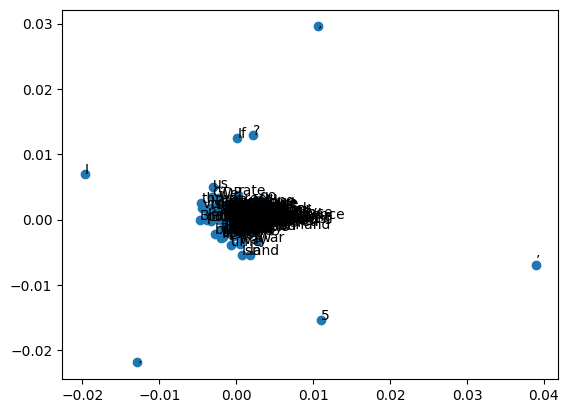

In [ ]:
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(model.wv.vectors)

# Plot the words
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for i, word in enumerate(model.wv.index_to_key):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.show()